## Importing package

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import os

## Data Wrangling

### Importing Data

In [40]:
data_frames = {}
data_folder_path = '../data'

for filename in os.listdir(data_folder_path):
    name = os.path.splitext(filename)[0]
    filepath = os.path.join(data_folder_path, filename)
    data_frames[name] = pd.read_csv(filepath)

print(data_frames)

{'product_checkout':              date  checkout_id  is_checkout  qty unit_price
0      2024-12-27      6119008            0    0  Rp 25.000
1      2024-12-27      7003039            0    0  Rp 25.000
2      2024-12-28      2570606            0    0  Rp 25.000
3      2024-12-28      7988659            1    3  Rp 25.000
4      2024-12-28      9540890            1    1  Rp 25.000
...           ...          ...          ...  ...        ...
10462  2025-06-01      9560732            1    2  Rp 25.000
10463  2025-06-01      9615881            0    0  Rp 25.000
10464  2025-06-01      9739102            0    0  Rp 25.000
10465  2025-06-01      9803864            0    0  Rp 25.000
10466  2025-06-01      9823285            0    0  Rp 25.000

[10467 rows x 5 columns], 'campaign_result':              date  campaign_id  user_id  checkout_id  is_click
0      2024-12-31            1        1      5073872       0.0
1      2024-12-31            1        2      5917917       0.0
2      2024-12-31       

In [42]:
data_frames['campaign_budget'].head(5)

,date,campaign_id,budget
0,2024-12-31,1,15310
1,2024-12-31,2,17402
2,2025-01-01,1,18546
3,2025-01-01,2,14592
4,2025-01-02,1,16993


In [43]:
data_frames['campaign_result'].head(5)

,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
1,2024-12-31,1,2,5917917,0.0
2,2024-12-31,1,3,7493460,0.0
3,2024-12-31,1,4,9720866,0.0
4,2024-12-31,1,5,2969097,1.0


In [44]:
data_frames['product_checkout'].head(5)

,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000


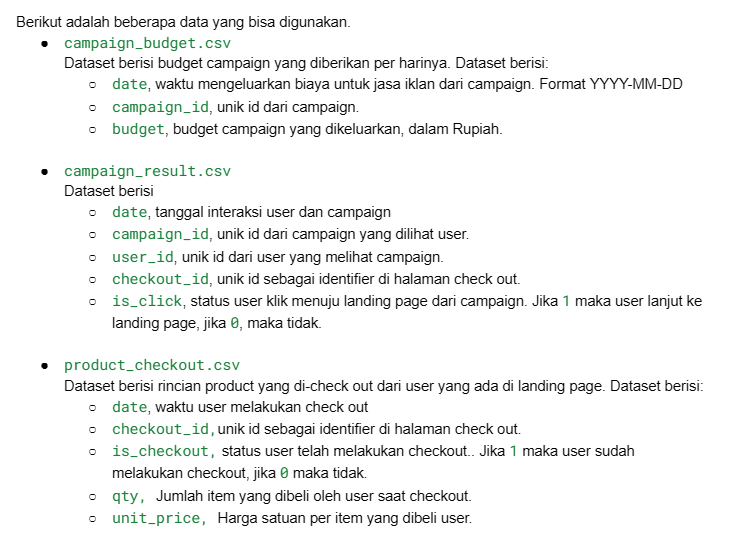

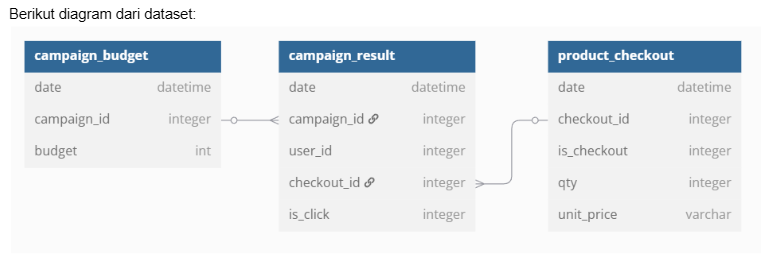

### Cleaning Data

0

### EDA